# Exploratory data analysis

**We still start out by looking at our dataset after, we will see their correlation of each of the predictors and choose predictors that are beneficial in solving our problem**

**Function to show Boxplot, histplot and violinplot ( showPlots(df,len(df.columns) )**

In [33]:
def showPlots(tempData, columns):
    f, axes = plt.subplots(columns,3, figsize=(30,20))
    count =0
    for var in tempData:
        try:
            sb.boxplot(data =tempData[var],orient ="h", ax =axes[count,0])
            sb.histplot(data =tempData[var],ax =axes[count,1])
            sb.violinplot(data =tempData[var],orient ="h", ax =axes[count,2])
            count+=1
        except:
            print("Skipping column: ",var)

**Function to show HeatMap ( heatMap(df,row size, col size) )**

In [34]:
def heatMap(df,row,col):
    f = plt.figure(figsize=(row, col))
    sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

**Function to retrieve List/Key**

In [36]:
def getList(dict):
    return dict.keys()
name = getList(carrierindex)

In [37]:
def get_key(my_dict,val):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

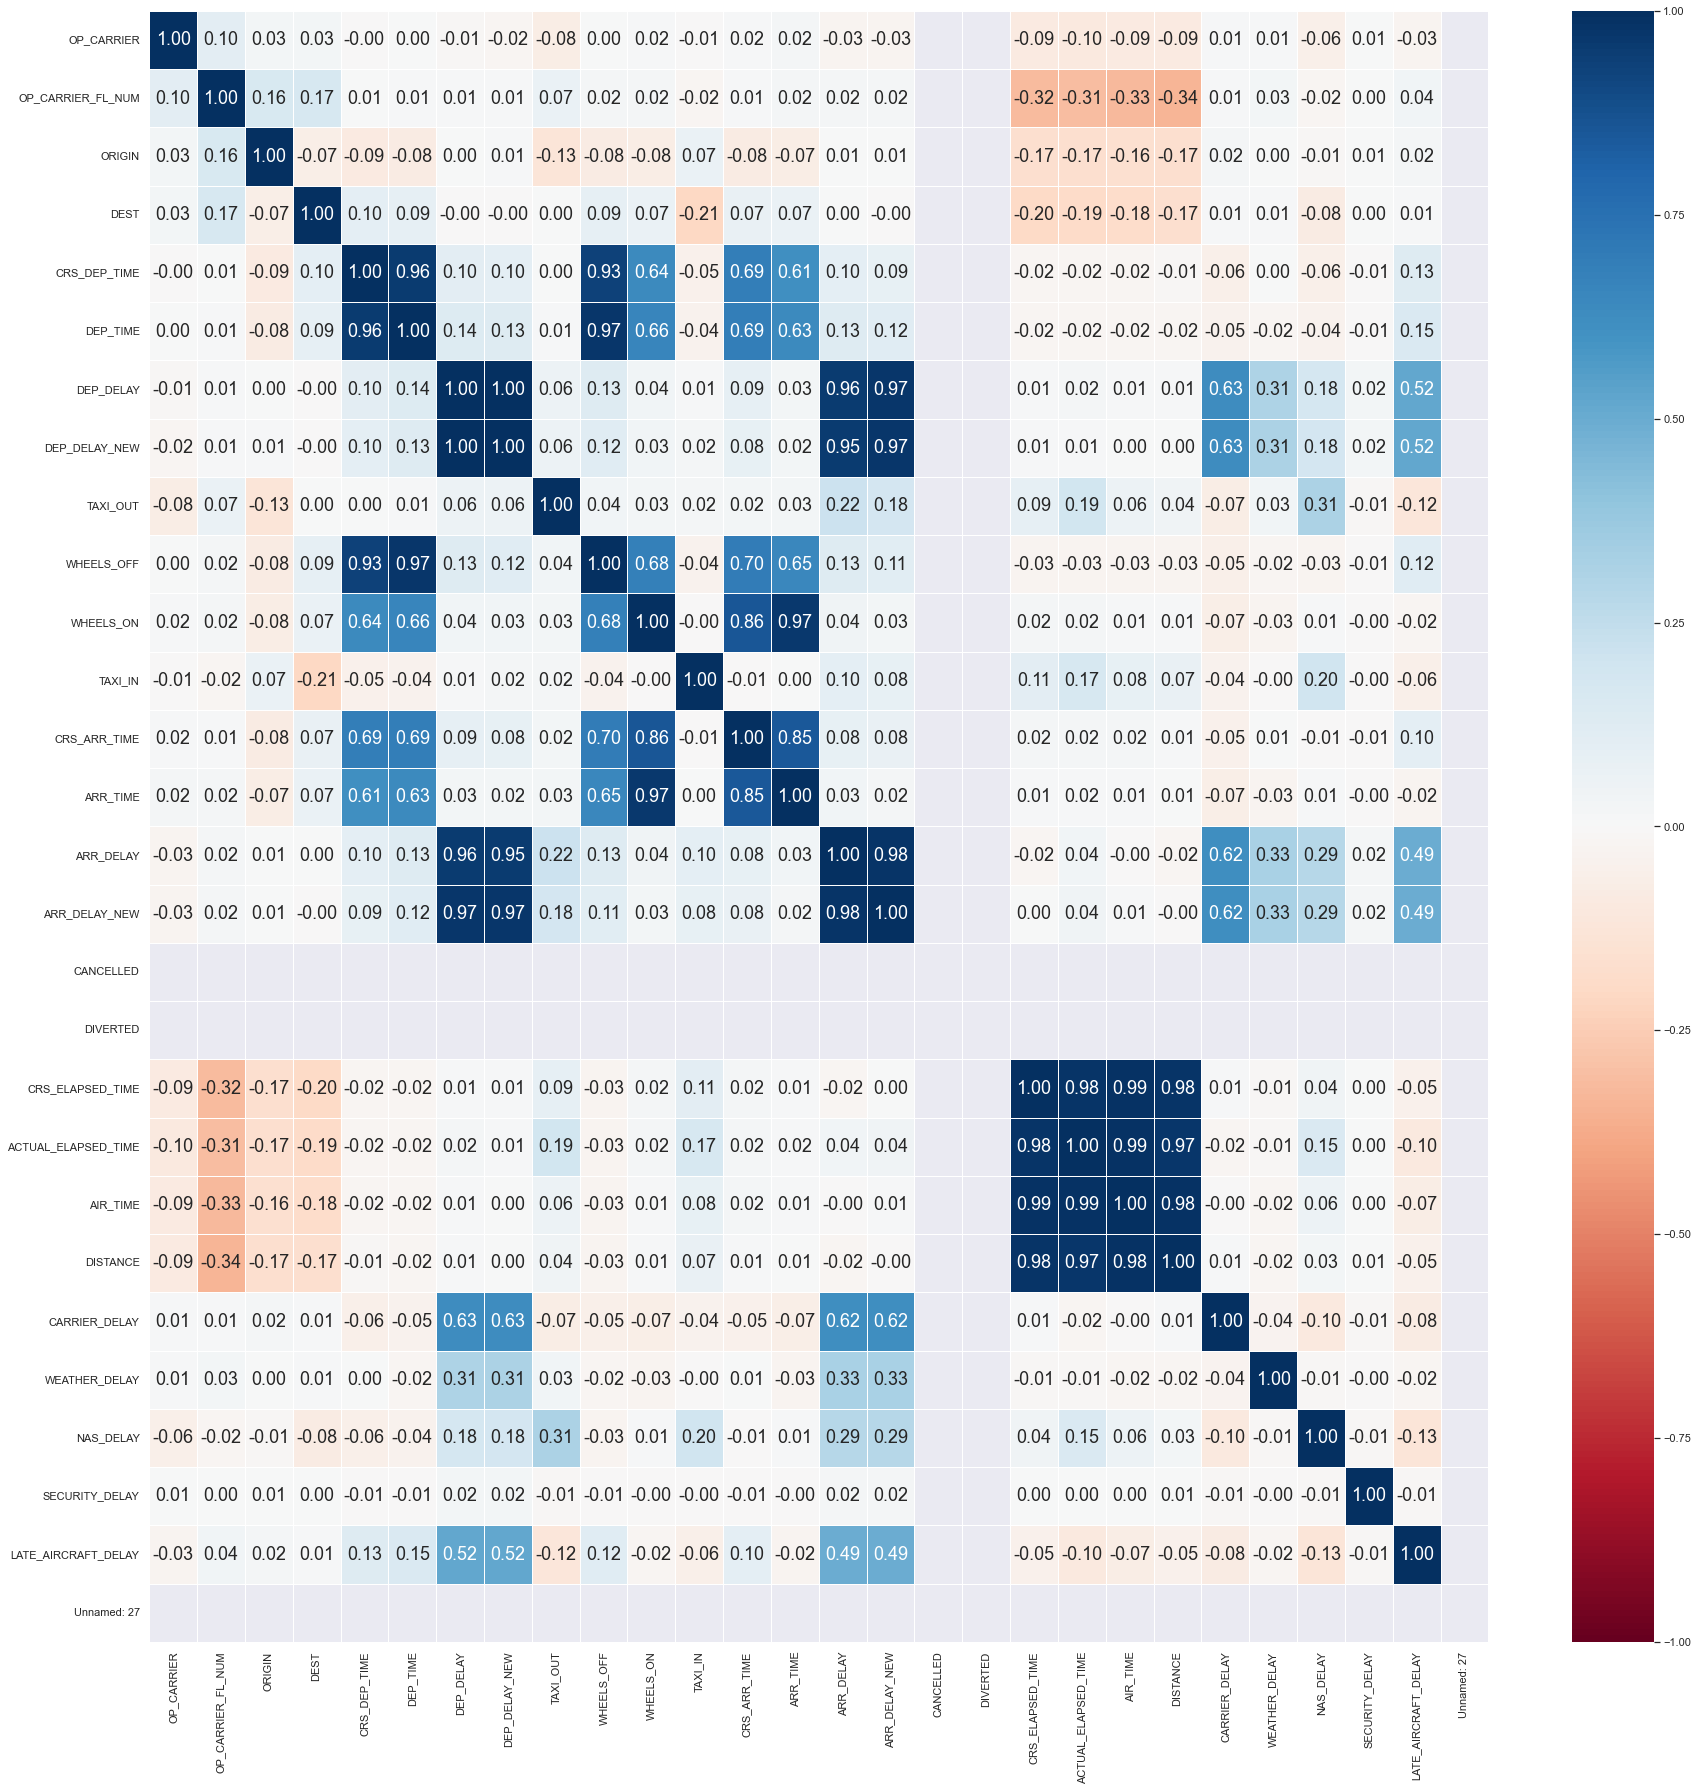

In [38]:
heatMap(flightdata_df,30,30)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


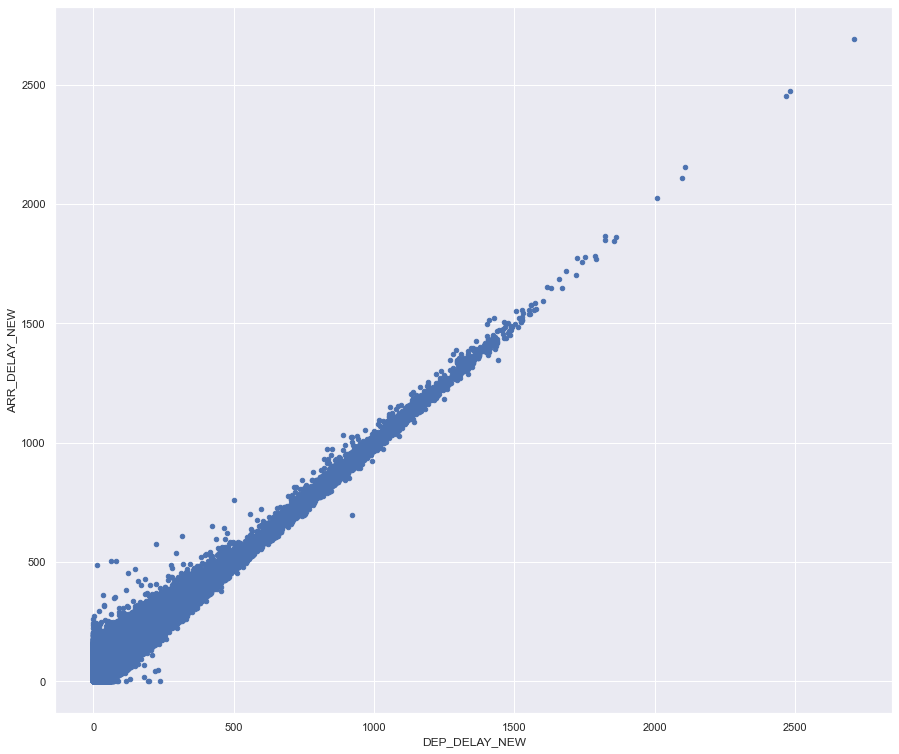

In [54]:
flightdata_df.plot.scatter(x="DEP_DELAY_NEW", y="ARR_DELAY_NEW");

**Based on our observation, we also observed that ARR_DELAY_NEW is highly correlated to DEP_DELAY_NEW and it make sense because when a flight depart late, its arrival time will eventually be late. We also observed several predictors which have low correlation to DEP/ARR delays. We will extract "OP_CARRIER" to find out the carrier that has the highest number of delays, extract "ORIGIN" to find out the country that has the highest number of delays.**

In [39]:
flightdata_df[['OP_CARRIER','DEP_DELAY_NEW','ARR_DELAY_NEW','CANCELLATION_CODE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].describe()

,OP_CARRIER,DEP_DELAY_NEW,ARR_DELAY_NEW,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,7.071818e+06,7.071818e+06,7.071818e+06,1.352375e+06,1.352375e+06,1.352375e+06,1.352375e+06,1.352375e+06
mean,1.052895e+01,1.313459e+01,1.342195e+01,1.945983e+01,3.637360e+00,1.588203e+01,9.356207e-02,2.565047e+01
std,5.636126e+00,4.352941e+01,4.348008e+01,5.891462e+01,2.999967e+01,3.589603e+01,3.174699e+00,4.979229e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00
75%,1.600000e+01,7.000000e+00,8.000000e+00,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.100000e+01
max,1.700000e+01,2.710000e+03,2.692000e+03,2.109000e+03,2.692000e+03,1.848000e+03,9.870000e+02,2.454000e+03


**Based on the observation, we can see that there are outliers that is too far away from the median. We will remove the outliers later**

# Choose predictors and get rid of outliers



In [40]:
#remove Outliers
Q1 = flightdata_df.quantile(0.25)
Q3 = flightdata_df.quantile(0.75)
IQR = Q3-Q1
newData = flightdata_df[~((flightdata_df <(Q1 -1.5*IQR))|(flightdata_df > (Q3 +1.5*IQR))).any(axis=1)]

C:\Users\ADRIAN~1\AppData\Local\Temp/ipykernel_22012/4182160994.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  newData = flightdata_df[~((flightdata_df <(Q1 -1.5*IQR))|(flightdata_df > (Q3 +1.5*IQR))).any(axis=1)]


In [41]:
flightData = newData[['ARR_TIME','ARR_DELAY_NEW','DEP_DELAY_NEW','DEP_DELAY','CARRIER_DELAY','NAS_DELAY','LATE_AIRCRAFT_DELAY','OP_CARRIER','ORIGIN']]

In [42]:
flightData[['ARR_DELAY_NEW','DEP_DELAY_NEW']].describe()

,ARR_DELAY_NEW,DEP_DELAY_NEW
count,3.670944e+06,3.670944e+06
mean,1.144973e+00,1.398853e+00
std,3.228388e+00,3.481568e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,2.000000e+01,1.700000e+01


**We chose 'ARR_TIME','ARR_DELAY_NEW','DEP_DELAY_NEW','DEP_DELAY','CARRIER_DELAY','NAS_DELAY','LATE_AIRCRAFT_DELAY' predictors as we observe from the heatmap that they are correlated with each other. We chose 'OP_CARRIER','ORIGIN' because we want to explore the delays based on the airlines and origin of the airport**

<AxesSubplot:xlabel='DEP_DELAY'>

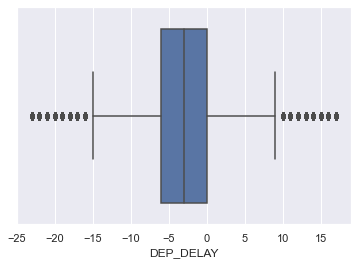

In [43]:
sb.boxplot(x=newData['DEP_DELAY'])

**Based on our observation, we can conclude that more than 75% of delays are 0 as negative delays refers to early departure which is not beneficial for our problem. We will be converting all negative delays into zeros and store into "DEP_DELAY_NEW". Hence, we will be using "DEP_DELAY_NEW" from now on. We were not able to show the boxplot for "DEP_DELAY_NEW" it is highly compressed**

**Comparing before/after removing outliers using heatmap, we could see that NAS_DELAY is highly correlated to the Departure Delay**

<AxesSubplot:xlabel='DEP_DELAY', ylabel='Density'>

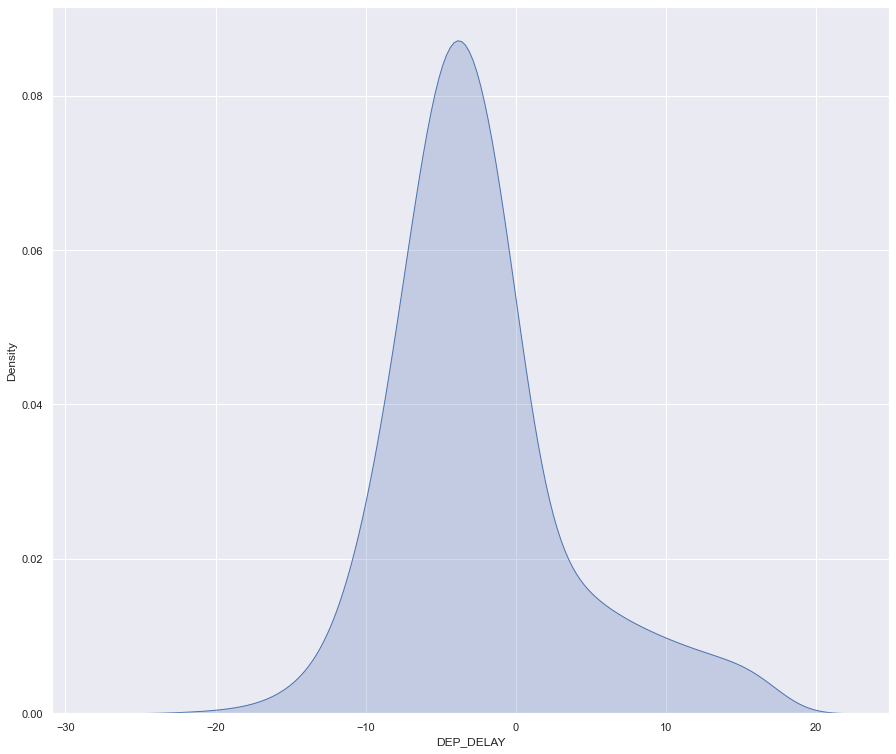

In [64]:
sb.kdeplot(
   data=newData, x="DEP_DELAY",
   fill=True,bw_method=0.3)

**Based on the Kernel Density Estimate plot, we observed that most of the delays lies between -5 to -2**

                     ARR_TIME  ARR_DELAY_NEW  DEP_DELAY_NEW  DEP_DELAY  \
ARR_TIME             1.000000       0.041293       0.101500   0.097589   
ARR_DELAY_NEW        0.041293       1.000000       0.427520   0.394380   
DEP_DELAY_NEW        0.101500       0.427520       1.000000   0.844112   
DEP_DELAY            0.097589       0.394380       0.844112   1.000000   
CARRIER_DELAY        0.006030       0.034179       0.609386   0.593512   
NAS_DELAY           -0.098848       0.213877      -0.872918  -0.842029   
LATE_AIRCRAFT_DELAY  0.132195       0.013467       0.522217   0.497358   
OP_CARRIER           0.017895      -0.005365       0.042480   0.140973   
ORIGIN              -0.086075      -0.008818      -0.015473  -0.073960   

                     CARRIER_DELAY  NAS_DELAY  LATE_AIRCRAFT_DELAY  \
ARR_TIME                  0.006030  -0.098848             0.132195   
ARR_DELAY_NEW             0.034179   0.213877             0.013467   
DEP_DELAY_NEW             0.609386  -0.872918    

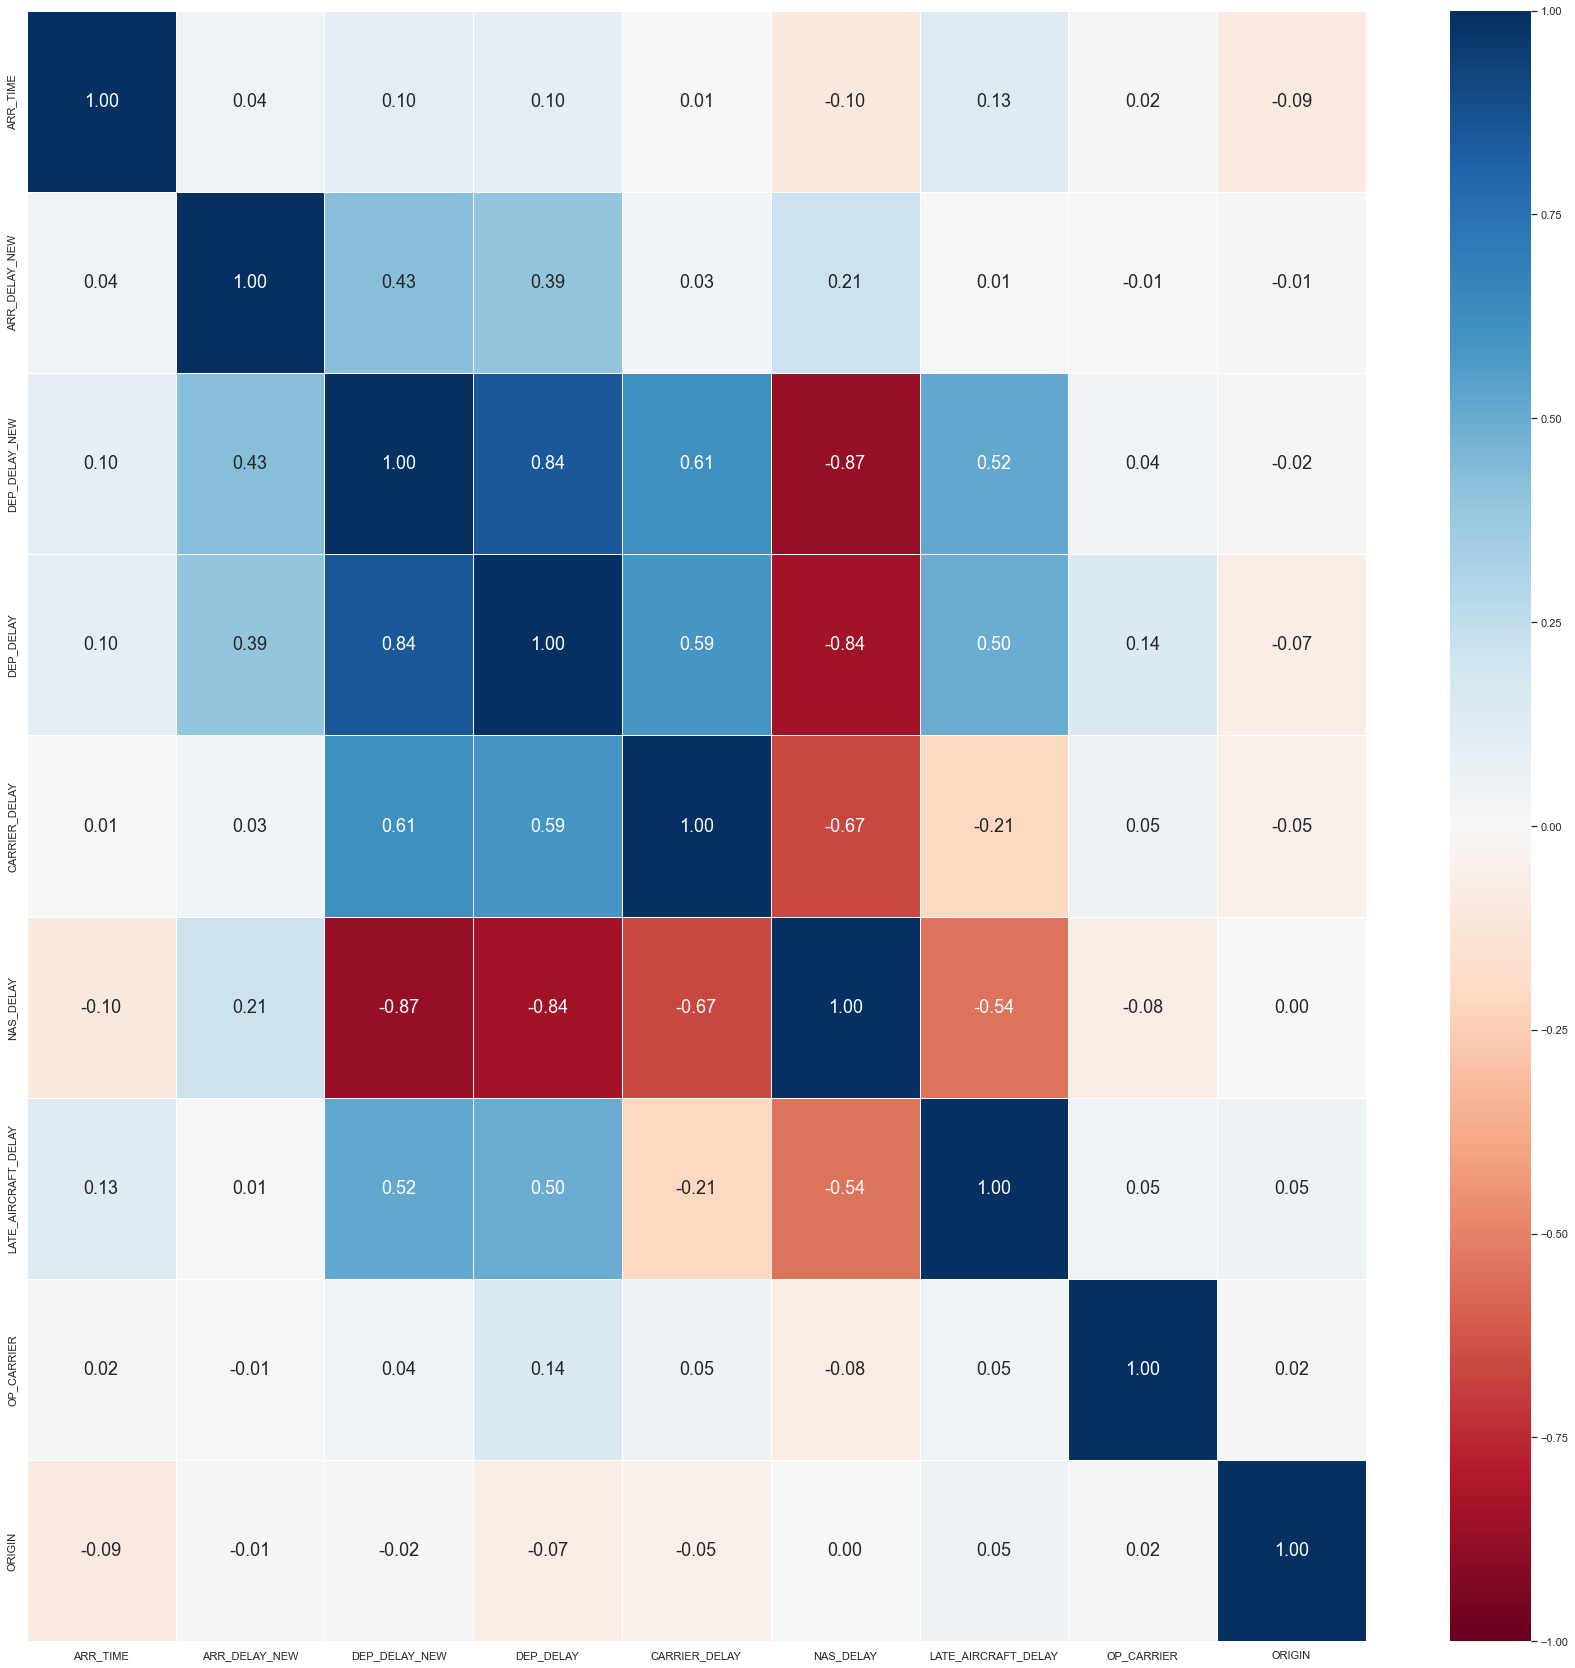

In [44]:
print(flightData.corr())
heatMap(flightData,30,30)

C:\Users\ADRIAN LIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADRIAN LIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Minutes'), Text(0, 0.5, 'Airline')]

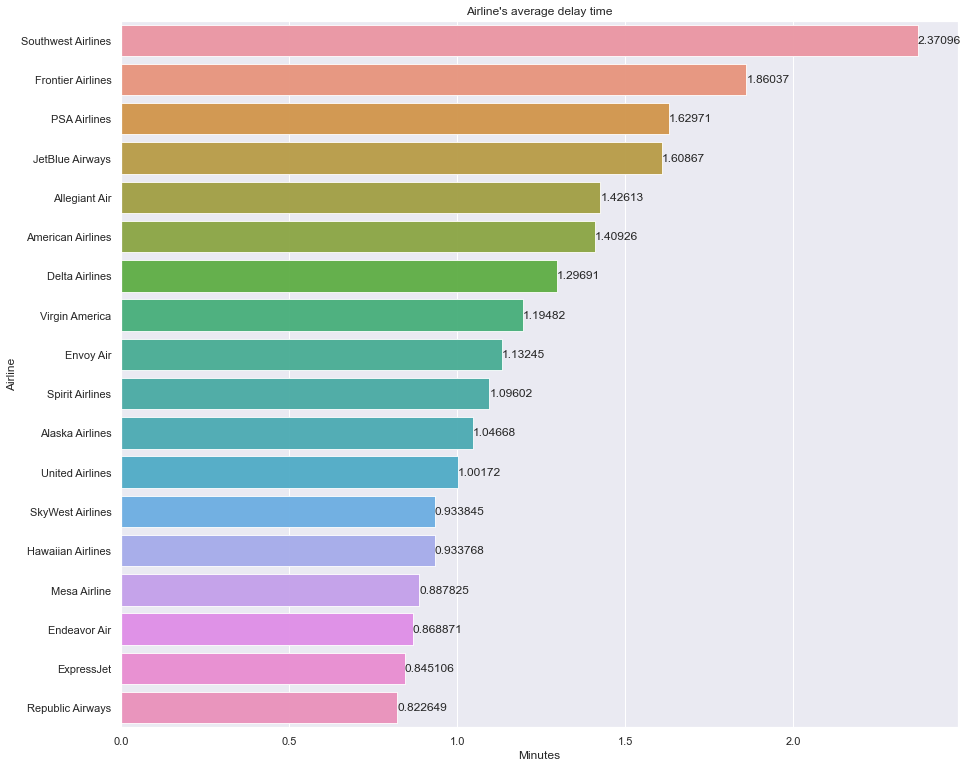

In [46]:
sb.set(rc={'figure.figsize':(15,13)})
averageFlight = newData.groupby('OP_CARRIER').DEP_DELAY_NEW.mean()
averageFlight.index = list(name)
averageFlight=averageFlight.sort_values(ascending=False).head(20)
sb.barplot(averageFlight.values, averageFlight.index, alpha=0.8,orient='h').set(title="Airline's average delay time")
ax =sb.barplot(averageFlight.values, averageFlight.index, alpha=0.8,orient='h')
ax.bar_label(ax.containers[0])
ax.set(xlabel="Minutes", ylabel = "Airline")

**By Visualizing the plot, we observed that the top 5 Airlines with highest average delay timing are as follows:**

**1) Frontier Airline**\
**2) JetBlue Airways**\
**3) Allegiant Air**\
**4) DexpressJet**\
**5) PSA Airlines**


C:\Users\ADRIAN LIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADRIAN LIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '671465'),
 Text(0, 0, '606547'),
 Text(0, 0, '527857'),
 Text(0, 0, '368175'),
 Text(0, 0, '286129'),
 Text(0, 0, '181786'),
 Text(0, 0, '137572'),
 Text(0, 0, '131953'),
 Text(0, 0, '131031'),
 Text(0, 0, '110807'),
 Text(0, 0, '108578'),
 Text(0, 0, '100251'),
 Text(0, 0, '98801'),
 Text(0, 0, '66936'),
 Text(0, 0, '61692'),
 Text(0, 0, '58145'),
 Text(0, 0, '17347'),
 Text(0, 0, '5872')]

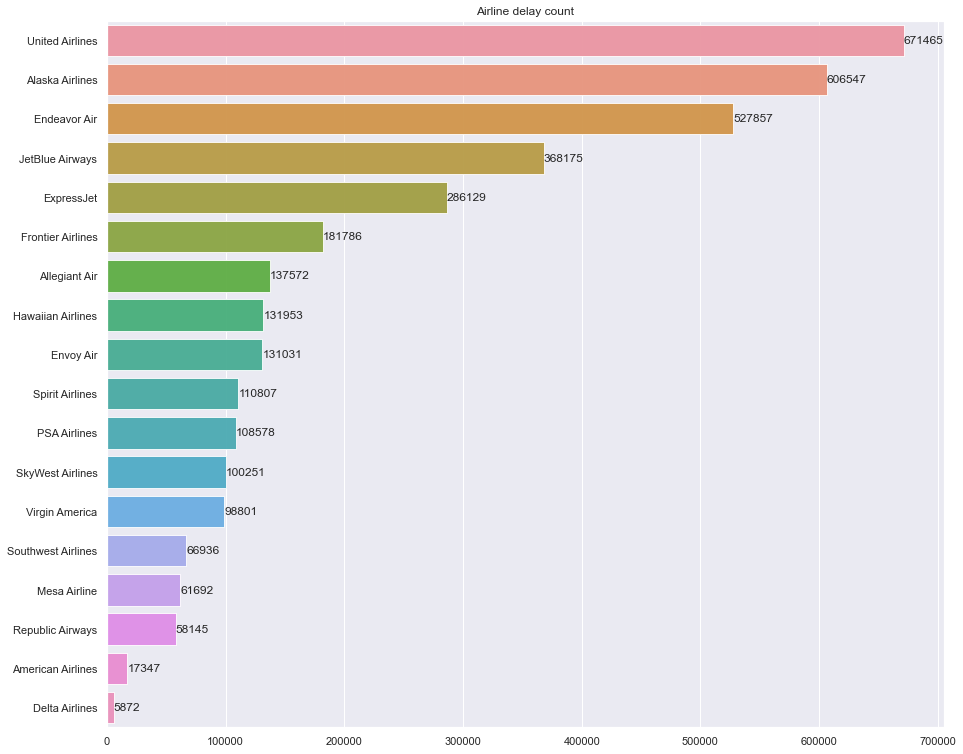

In [47]:
temptemptemp = flightData["OP_CARRIER"].value_counts()
temptemptemp.index = list(name)
AirlineDelay = temptemptemp.sort_values(ascending=False).head(20)
sb.set(rc={'figure.figsize':(15,13)})
sb.barplot(AirlineDelay.values, AirlineDelay.index, alpha=0.8,orient='h').set(title="Airline delay count")
ax =sb.barplot(AirlineDelay.values, AirlineDelay.index, alpha=0.8,orient='h')
ax.bar_label(ax.containers[0])

**By Visualizing the plot, we observed that the top 5 Airlines with highest delay counts are as follows:**

**1) United Airline**\
**2) Alaska Airways**\
**3) Endeavor Air**\
**4) JetBlue Airways**\
**5) ExpressJet**


C:\Users\ADRIAN LIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADRIAN LIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '385662'),
 Text(0, 0, '324838'),
 Text(0, 0, '273169'),
 Text(0, 0, '233741'),
 Text(0, 0, '226712'),
 Text(0, 0, '218992'),
 Text(0, 0, '172958'),
 Text(0, 0, '172275'),
 Text(0, 0, '171485'),
 Text(0, 0, '163002'),
 Text(0, 0, '159656'),
 Text(0, 0, '156840'),
 Text(0, 0, '154914'),
 Text(0, 0, '143771'),
 Text(0, 0, '139015'),
 Text(0, 0, '138861'),
 Text(0, 0, '136517'),
 Text(0, 0, '128305'),
 Text(0, 0, '125194'),
 Text(0, 0, '113476'),
 Text(0, 0, '112289'),
 Text(0, 0, '104162'),
 Text(0, 0, '96274'),
 Text(0, 0, '89626'),
 Text(0, 0, '86685'),
 Text(0, 0, '84883'),
 Text(0, 0, '73517'),
 Text(0, 0, '72940'),
 Text(0, 0, '69828'),
 Text(0, 0, '67463')]

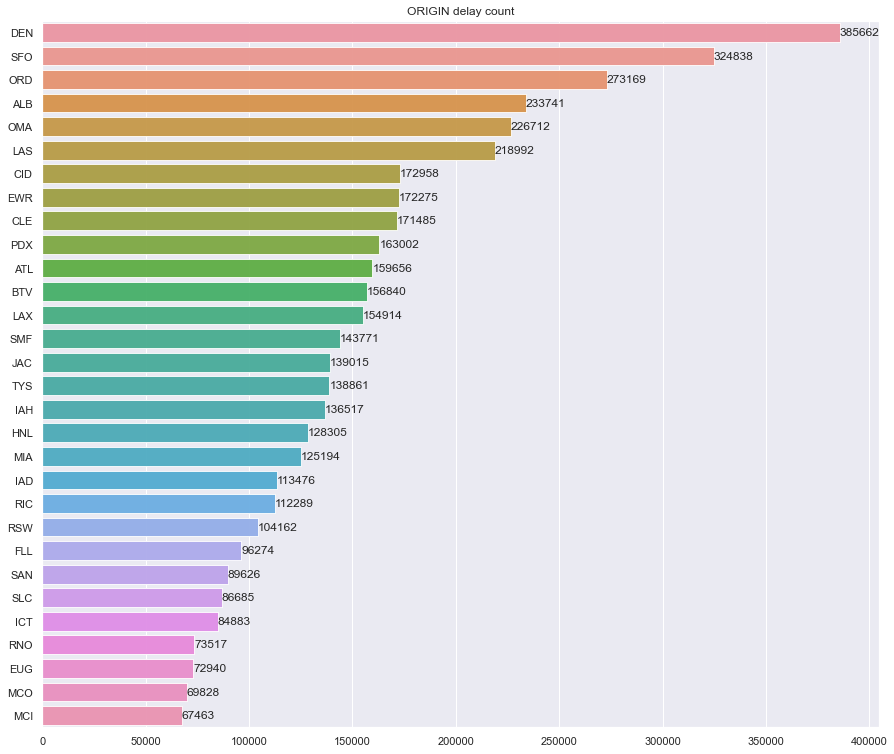

In [48]:
temptemptemp = flightdata_df["ORIGIN"].value_counts()
airportList = getList(airportDict)
temptemptemp.index =list(airportList)
originDelay = temptemptemp.sort_values(ascending=False).head(30)
sb.set(rc={'figure.figsize':(15,13)})
sb.barplot(originDelay.values, originDelay.index, alpha=0.8,orient='h').set(title="ORIGIN delay count")
ax =sb.barplot(originDelay.values, originDelay.index, alpha=0.8,orient='h')
ax.bar_label(ax.containers[0])

**By Visualizing the plot, we observed that the top 5 States with highest delay counts are as follows:**

**1) Denver**\
**2) San Francisco**\
**3) O’Hare Airport (Chicago)** \
**4) Albany International Airport (New York)** \
**5) Omaha (Eppley Airfield)**



C:\Users\ADRIAN~1\AppData\Local\Temp/ipykernel_22012/1809614861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData["ORIGINNAME"] = newData['ORIGIN'].map(new_dict)
C:\Users\ADRIAN LIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADRIAN LIM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an ex

[Text(0.5, 0, 'Minutes'), Text(0, 0.5, 'Airline')]

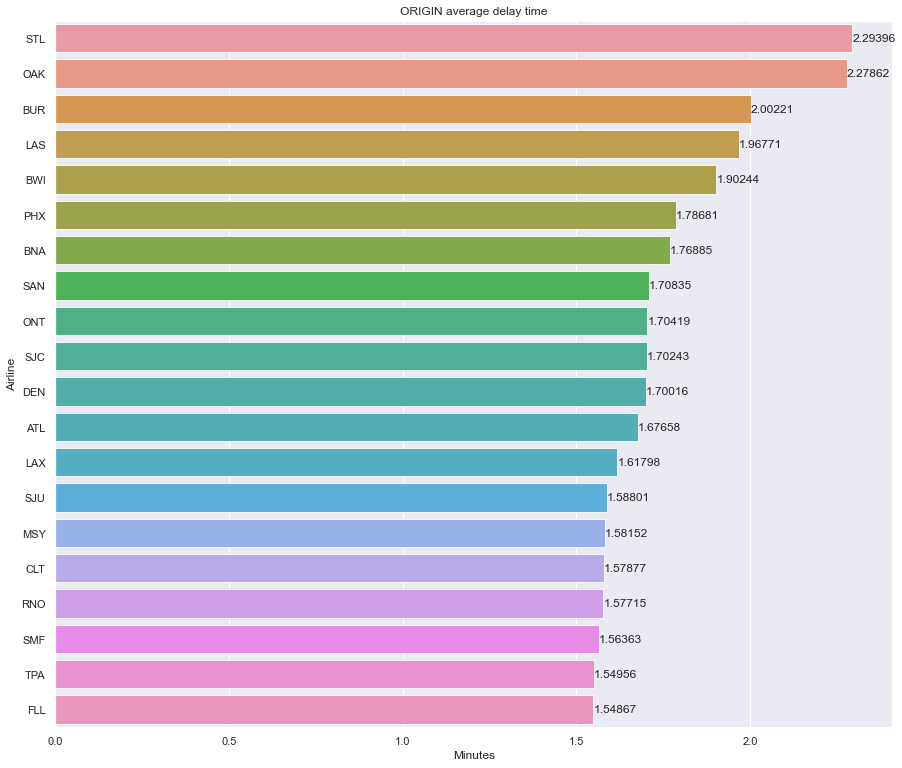

In [51]:
new_dict = dict([(value, key) for key, value in airportDict.items()])
newData["ORIGINNAME"] = newData['ORIGIN'].map(new_dict)
sb.set(rc={'figure.figsize':(15,13)})
averageFlight = newData.groupby('ORIGINNAME').DEP_DELAY_NEW.mean()

#averageFlight.index = list(airportList)
averageFlight=averageFlight.sort_values(ascending=False).head(20)
averageFlight.rename(new_dict)
sb.barplot(averageFlight.values, averageFlight.index, alpha=0.8,orient='h').set(title="ORIGIN average delay time")
ax =sb.barplot(averageFlight.values, averageFlight.index, alpha=0.8,orient='h')
ax.bar_label(ax.containers[0])
ax.set(xlabel="Minutes", ylabel = "Airline")

**By Visualizing the plot, we observed that the top 5 States with highest average delay time are as follows:**

**1) STL (St. Louis)** \
**2) OAK (Oakland)** \
**3) BUR (Burbank)** \
**4) LAS (Las vegas)** \
**5) BWI (Baltimore/D.C)**



In [2]:
newData.to_csv (r'INPUT PATH HERE', index = False, header=True)

# note: change the path name inside the quotation marks to the address where you want the CSV to be exported to.
# make sure the imported file ends with (.csv). You can also use .txt if you want.
# after running this code snippet the CSV will be downloaded into the path address

NameError: name 'newData' is not defined